# Setting the Influent in Sumo - Introductory Practice and Example

Import relevant libraries

In [1]:
from dynamita.sumo import *

import numpy
import time
import copy as cp
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sumo = Sumo(sumoPath="C:/Users/Sara/AppData/Local/Dynamita/Sumo19",
           licenseFile=r"C:/Users/Sara/Desktop/sewerWRRF/networklicense.sumolic")

License OK...


In [3]:
unchanged = 1
changed = 1

### Run with unchanged model variables

In [4]:
if unchanged == 1:
    
    def datacomm_callback(sumo):
        t_noset.append(sumo.core.csumo_var_get_time_double(sumo.handle))
        snhx_cstr_noset.append(sumo.core.csumo_var_get_pvtarray_pos(sumo.handle, snhx_cstr_pos, 0))
        snhx_effl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
        xtss_effl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
        snhx_infl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_infl_pos))
        return 0
    
    sumo.unload_model()
    sumo.load_model('A2O plant.sumo')
    
    sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
    
    sumo.register_datacomm_callback(datacomm_callback)
    
    snhx_cstr_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__CSTR__SNHx')
    snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
    xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')
    snhx_infl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Influent__SNHx')
    
    sumo.set_stopTime(10*24*60*60*1000)
    sumo.set_dataComm(50*60*1000)
    
    t_noset = []
    snhx_cstr_noset = []
    snhx_effl_noset = []
    xtss_effl_noset = []
    snhx_infl_noset = []
    
    sumo.run_model()
    while not sumo.simulation_finished:
        time.sleep(0.01)
        
    snhx_cstr_noset_cp = cp.deepcopy(snhx_cstr_noset)
    snhx_effl_noset_cp = cp.deepcopy(snhx_effl_noset)
    xtss_effl_noset_cp = cp.deepcopy(xtss_effl_noset)
    snhx_infl_noset_cp = cp.deepcopy(snhx_infl_noset)
    t_noset_cp = cp.deepcopy(t_noset)

No model is loaded


### Changing mu_NITO parameter

In [5]:
if changed == 1:
    def datacomm_callback(sumo):
        t_set.append(sumo.core.csumo_var_get_time_double(sumo.handle))
        snhx_cstr_set.append(sumo.core.csumo_var_get_pvtarray_pos(sumo.handle, snhx_cstr_pos, 0))
        snhx_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
        xtss_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
        snhx_infl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_infl_pos))
        return 0
    
    sumo.unload_model()
    sumo.load_model('A2O plant.sumo')
    
    sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
    
    sumo.register_datacomm_callback(datacomm_callback)
    
    snhx_cstr_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__CSTR__SNHx')
    snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
    xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')
    snhx_infl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Influent__SNHx')
    
    # Set variables in model
    command = 'set Sumo__Plant__param__Sumo1__muNITO 1.95;'
    
    sumo.core.csumo_command_send(sumo.handle, command.encode('utf8'))
    
    sumo.set_stopTime(10*24*60*60*1000)
    sumo.set_dataComm(50*60*1000)
    
    t_set = []
    snhx_cstr_set = []
    snhx_effl_set = []
    xtss_effl_set = []
    snhx_infl_set = []
    
    sumo.run_model()
    while not sumo.simulation_finished:
        time.sleep(0.01)
    
    snhx_cstr_set_cp = cp.deepcopy(snhx_cstr_set)
    snhx_effl_set_cp = cp.deepcopy(snhx_effl_set)
    xtss_effl_set_cp = cp.deepcopy(xtss_effl_set)
    snhx_infl_set_cp = cp.deepcopy(snhx_infl_set)
    t_set_cp = cp.deepcopy(t_set)

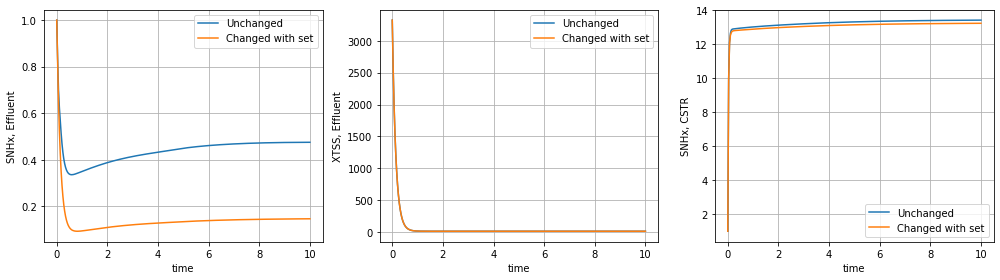

In [7]:
fig, (axs) = plt.subplots(1,3, figsize=(14,4))

if unchanged == 1:
    axs[0].plot(t_noset_cp, snhx_effl_noset_cp, label='Unchanged')
    axs[1].plot(t_noset_cp, xtss_effl_noset_cp, label='Unchanged')
    #axs[2].plot(t_noset_cp, snhx_infl_noset_cp, label='Unchanged')
    axs[2].plot(t_noset_cp, snhx_cstr_noset_cp, label='Unchanged')

if changed == 1:
    axs[0].plot(t_set_cp, snhx_effl_set_cp, label='Changed with set')
    axs[1].plot(t_set_cp, xtss_effl_set_cp, label='Changed with set')
    #axs[2].plot(t_set_cp, snhx_infl_set_cp, label='Changed with set')
    axs[2].plot(t_set_cp, snhx_cstr_set_cp, label='Changed with set')

axs[0].set_xlabel('time'); axs[0].set_ylabel('SNHx, Effluent')
axs[1].set_xlabel('time'); axs[1].set_ylabel('XTSS, Effluent')
#axs[2].set_xlabel('time'); axs[2].set_ylabel('SNHx, Influent')
axs[2].set_xlabel('time'); axs[2].set_ylabel('SNHx, CSTR')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.rcParams['axes.grid'] = True
plt.tight_layout()

### Changing mu_NITO to several values

In [8]:
def datacomm_callback(sumo):
    t_set.append(sumo.core.csumo_var_get_time_double(sumo.handle))
    snhx_cstr_set.append(sumo.core.csumo_var_get_pvtarray_pos(sumo.handle, snhx_cstr_pos, 0))
    snhx_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
    xtss_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
    snhx_infl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_infl_pos))
    return 0

sumo.unload_model()
sumo.load_model('A2O plant.sumo')
    
sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
    
sumo.register_datacomm_callback(datacomm_callback)

def message_callback(sumo):
    for message in sumo.messages:
        print(message)
    sumo.messages = []
    return 0

sumo.register_message_callback(message_callback)

snhx_cstr_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__CSTR__SNHx')
snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')
snhx_infl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Influent__SNHx')

530021 Set: Sumo__StopTime to 0
530021 Set: Sumo__DataComm to 3600000
530021 Set: Sumo__PlantName to C:\Users\DYNAMI~1\AppData\Local\Dynamita\Sumo18\TMP~1\xjzoiwqs.cba\SUMOPR~1.XML
530049 Core loop started.
530036 Script file script_Initialize.scs loaded.
530020 Set mode: dynamic
530021 Set: Sumo__Plant__CSTR__param__L_V to 1000
530021 Set: Sumo__Plant__CSTR__param__Qair_N to 0
530021 Set: Sumo__Plant__CSTR2__param__L_V to 1500
530021 Set: Sumo__Plant__CSTR2__param__Qair_N to 0
530021 Set: Sumo__Plant__CSTR3__param__L_V to 4500
530021 Set: Sumo__Plant__Sideflowdivider__param__Qpumped_target to 72000
530021 Set: Sumo__StopTime to 864000000
530021 Set: Sumo__DataComm to 3000000
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__StopTime to 0
530021 Set: Sumo__DataComm to 3600000
530021 Set: Sumo__PlantName to C:\Users\DYNAMI~1\AppData\Local\Dynamita\Sumo18\TMP~1\xjzoiwqs.cba\SUMOPR~1.XML
530049 Core loop started.
530036 Script file script_Initialize.scs loaded.
530020 

In [10]:
snhx_sensitivity_data = {}
sumo.set_stopTime(2*24*60*60*1000)
sumo.set_dataComm(50*60*1000)
for mu in [0.1, 1.95, 0.9]:
    command = 'set Sumo__Plant__param__Sumo1__muNITO ' + str(mu) + ';'

    sumo.core.csumo_command_send(sumo.handle, command.encode('utf8'))
    
    # Do not forget to empty our lists before a simulation, otherwise
    # new simulation results would just be appended.
    t_set = []
    snhx_cstr_set = []
    snhx_effl_set = []
    xtss_effl_set = []
    snhx_infl_set = []
    
    # Let's have Sumo do some work
    sumo.run_model()
    # The run_model is an asynchronous call, so we need to wait until
    # the current run is finished, otherwise we would mess up our simulations
    while not sumo.simulation_finished:
        time.sleep(0.01)

    # Good, we got our data in the list, let's store them in our dictionary, using 
    # KNHx as the label
    snhx_sensitivity_data[mu] = snhx_effl_set

530021 Set: Sumo__StopTime to 172800000
530021 Set: Sumo__DataComm to 3000000
530021 Set: Sumo__Plant__param__Sumo1__muNITO to 0.1
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__param__Sumo1__muNITO to 1.95
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__param__Sumo1__muNITO to 0.9
530002 Simulation started.
530004 Simulation ended.


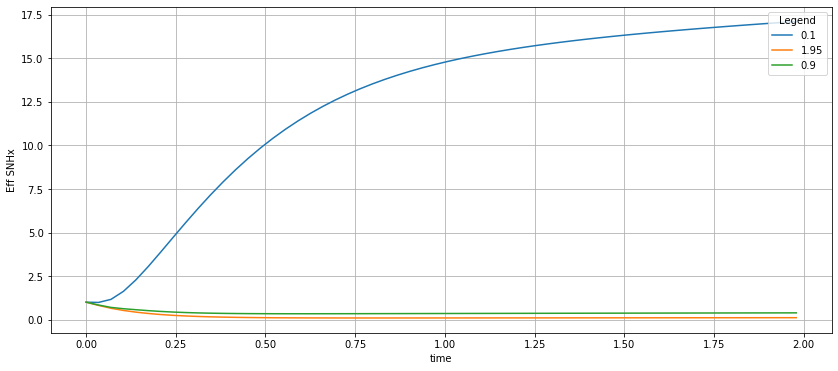

In [11]:
fig, axes = plt.subplots(1,1, figsize=(14,6))
axes.set_xlabel('time')
axes.set_ylabel('Eff SNHx')

for mu, snhx in snhx_sensitivity_data.items():
    axes.plot(t_set, snhx, label= str(mu))
    plt.legend(loc='upper right', title='Legend')

### Changing influent TKN concentration

**To change a parameter, you have to be able to change it from the GUI, which is why ammonium concentration cannot be changed directly.**

**If you want to change ammonium, do so by changing the influent fraction.**

To see all the parameters you can change, you can go to the Advanced > Core Window and expand the unit you are interested. Under each there is another node called "param" that lists all of the parameters for that unit. You can change those.

![Image](https://github.com/zerualem/SumoPython/blob/master/a2o.png?raw=true)

In [12]:
snhx_sensitivity_data = {}
sumo.set_stopTime(2*24*60*60*1000)
sumo.set_dataComm(50*60*1000)
for tkn in [1, 34.4, 50]:
    command = 'set Sumo__Plant__Influent__param__TKN ' + str(tkn) + ';'

    sumo.core.csumo_command_send(sumo.handle, command.encode('utf8'))
    
    t_set = []
    snhx_cstr_set = []
    snhx_effl_set = []
    xtss_effl_set = []
    snhx_infl_set = []
    
    sumo.run_model()
    
    while not sumo.simulation_finished:
        time.sleep(0.01)

    snhx_sensitivity_data[tkn] = snhx_effl_set

530021 Set: Sumo__StopTime to 172800000
530021 Set: Sumo__DataComm to 3000000
530021 Set: Sumo__Plant__Influent__param__TKN to 1
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__Influent__param__TKN to 34.4
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__Influent__param__TKN to 50
530002 Simulation started.
530004 Simulation ended.


In [13]:
import pandas as pd
pd.DataFrame(snhx_sensitivity_data).tail(10)

,1.0,34.4,50.0
38,0.000775,0.363521,1.149948
39,0.000756,0.364899,1.122125
40,0.000742,0.366266,1.095733
41,0.000730,0.367620,1.070758
42,0.000721,0.368963,1.047173
43,0.000714,0.370293,1.024940
44,0.000708,0.371611,1.004013
45,0.000703,0.372916,0.984339
46,0.000699,0.374207,0.965864
47,0.000696,0.375485,0.948526


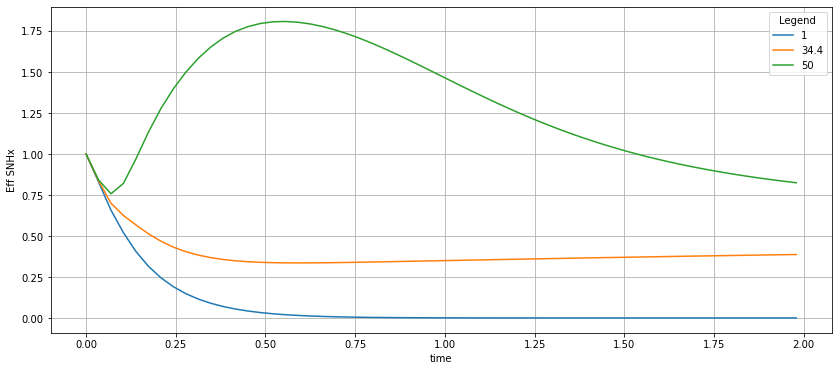

In [14]:
fig, axes = plt.subplots(1,1, figsize=(14,6))
axes.set_xlabel('time')
axes.set_ylabel('Eff SNHx')

for tkn, snhx in snhx_sensitivity_data.items():
    axes.plot(t_set, snhx, label= str(tkn))
    plt.legend(loc='upper right', title='Legend')

### Changing influent flow

In [18]:
q_sensitivity_data = {}
sumo.set_stopTime(2*24*60*60*1000)
sumo.set_dataComm(50*60*1000)
for q in [23000, 24000, 25000]:
    command = 'set Sumo__Plant__Influent__param__Q ' + str(q) + ';'

    sumo.core.csumo_command_send(sumo.handle, command.encode('utf8'))
    
    t_set = []
    snhx_cstr_set = []
    snhx_effl_set = []
    xtss_effl_set = []
    snhx_infl_set = []
    
    sumo.run_model()
    
    while not sumo.simulation_finished:
        time.sleep(0.01)

    q_sensitivity_data[q] = snhx_effl_set

530021 Set: Sumo__StopTime to 172800000
530021 Set: Sumo__DataComm to 3000000
530021 Set: Sumo__Plant__Influent__param__Q to 23000
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__Influent__param__Q to 24000
530002 Simulation started.
530004 Simulation ended.
530021 Set: Sumo__Plant__Influent__param__Q to 25000
530002 Simulation started.
530004 Simulation ended.


In [19]:
import pandas as pd
pd.DataFrame(q_sensitivity_data).tail(10)

,23000,24000,25000
48,0.853660,0.932266,1.016300
49,0.840532,0.917023,0.998690
50,0.828212,0.902735,0.982206
51,0.816654,0.889346,0.966776
52,0.805812,0.876798,0.952329
53,0.795641,0.865038,0.938799
54,0.786100,0.854015,0.926122
55,0.777148,0.843677,0.914239
56,0.768748,0.833978,0.903095
57,0.760864,0.824884,0.892640


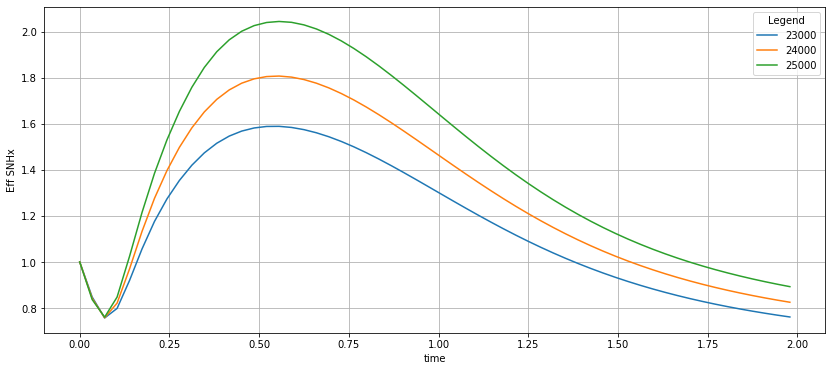

In [20]:
fig, axes = plt.subplots(1,1, figsize=(14,6))
axes.set_xlabel('time')
axes.set_ylabel('Eff SNHx')

for q, snhx in q_sensitivity_data.items():
    axes.plot(t_set, snhx, label= str(q))
    plt.legend(loc='upper right', title='Legend')